In [1]:
import pandas as pd

In [2]:
path_clean_df = "/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/amazon_review_stemming.parquet"
df = pd.read_parquet(path_clean_df, engine="pyarrow")
df.head()

,rating,clean_title,clean_review,clean_review_stemming
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,gave dad gag gift direct nunsens got reall kick
1,5,inspiring,i hope a lot of people hear this cd we need mo...,hope lot peopl hear cd need strong posit vibe ...
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,im read lot review say best game soundtrack fi...
3,4,chrono cross ost,the music of yasunori misuda is without questi...,music yasunori misuda without question close s...
4,5,too good to be true,probably the greatest soundtrack in history us...,probabl greatest soundtrack histori usual bett...


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [4]:
!pip install spacy


In [7]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

In [9]:
nltk.download('stopwords')
stopword_en = set(stopwords.words('english'))
stemmer_en = SnowballStemmer("english")
nlp_en = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def clean_with_stopwords_and_stemming(text):
    # Eliminar stopwords
    text = " ".join([word for word in text.split() if word not in stopword_en])
    # Aplicar stemming
    text = " ".join([stemmer_en.stem(word) for word in text.split()])
    # Eliminar espacios extras al inicio y final
    return text.strip()

In [11]:
def clean_with_stopwords_and_lemmatization(text):
    # Procesar el texto usando spaCy
    doc = nlp_en(text)
    # Eliminar stopwords y aplicar lematización
    lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_en]
    # Unir los tokens lematizados y eliminar espacios extra
    return " ".join(lemmatized).strip()

In [12]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
from tqdm.contrib.concurrent import process_map
import os

# Puedes ajustar el número de workers. '2' para dos ejecuciones como pediste,
# o 'os.cpu_count()' para usar todos los núcleos disponibles de tu CPU.
num_workers = 2

print(f"Ejecutando `clean_with_stopwords_and_stemming` en paralelo usando {num_workers} procesos...")

df['clean_review_stemming'] = process_map(
    clean_with_stopwords_and_stemming,
    df['clean_review'],
    max_workers=num_workers,
    chunksize=1000 # Ajusta el chunksize para optimizar el rendimiento. Un buen valor inicial suele ser entre 1000 y 5000.
)

print("Procesamiento paralelo completado.")

In [ ]:
df.to_parquet(
    "/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/amazon_review_stemming.parquet",
    engine="pyarrow",
    compression="snappy",
    index=False
)

In [13]:
df.head()

,rating,clean_title,clean_review,clean_review_stemming
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,gave dad gag gift direct nunsens got reall kick
1,5,inspiring,i hope a lot of people hear this cd we need mo...,hope lot peopl hear cd need strong posit vibe ...
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,im read lot review say best game soundtrack fi...
3,4,chrono cross ost,the music of yasunori misuda is without questi...,music yasunori misuda without question close s...
4,5,too good to be true,probably the greatest soundtrack in history us...,probabl greatest soundtrack histori usual bett...


In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
import re

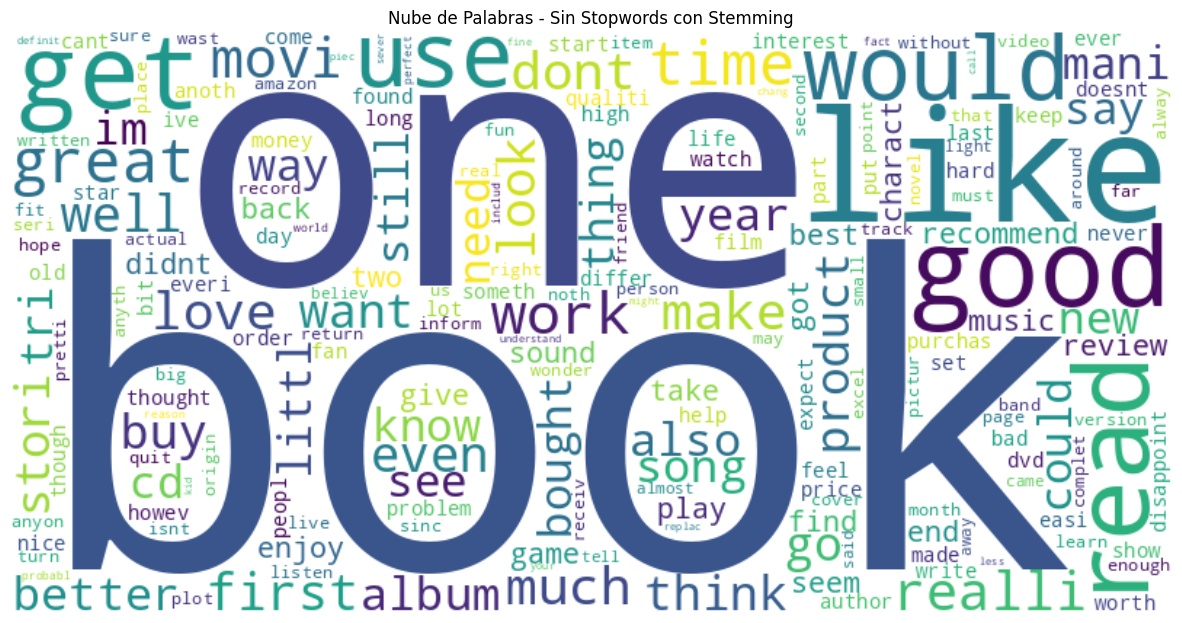

In [16]:
token_re = re.compile(r'\b\w+\b', flags=re.UNICODE)

def tokenize(text):
    return token_re.findall(text.lower())

# Creamos el contador
counter_limpio = Counter()

for review in df['clean_review_stemming'].dropna():
    tokens = tokenize(review)


    counter_limpio.update(tokens)

wordcloud_limpio = WordCloud(
    background_color="white",
    width=800, height=400,
    max_words=200
).generate_from_frequencies(counter_limpio)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_limpio, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Sin Stopwords con Stemming")
plt.show()